Read me: https://reason.gesdisc.eosdis.nasa.gov/data/nobm/NOBM_MON.R2017/doc/README_NOBM_R2017.pdf

Basemap tutorial: https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

In [2]:
pip install netCDF4

Note: you may need to restart the kernel to use updated packages.


In [3]:
import netCDF4

In [4]:
fp = '2015_1.nc4'
data = netCDF4.Dataset(fp)

In [32]:
data.variables.keys()

dict_keys(['tot', 'chl', 'dia', 'coc', 'cya', 'irn', 'rno', 'h', 'ice', 'time', 'lat', 'lon'])

In [5]:
list_lat = list(data.variables['lat'][:].data)
list_lon = list(data.variables['lon'][:].data)

In [6]:
print("Number of latitude: ", len(list_lat))
print("Number of longtitude: ", len(list_lon))

Number of latitude:  234
Number of longtitude:  288


In [7]:
raw_chl = data.variables['chl'][:].data[0]
raw_chl

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

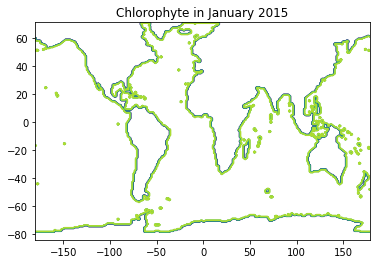

In [17]:
plt.contour(Y, X, raw_chl)
plt.title("Chlorophyte in January 2015")
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


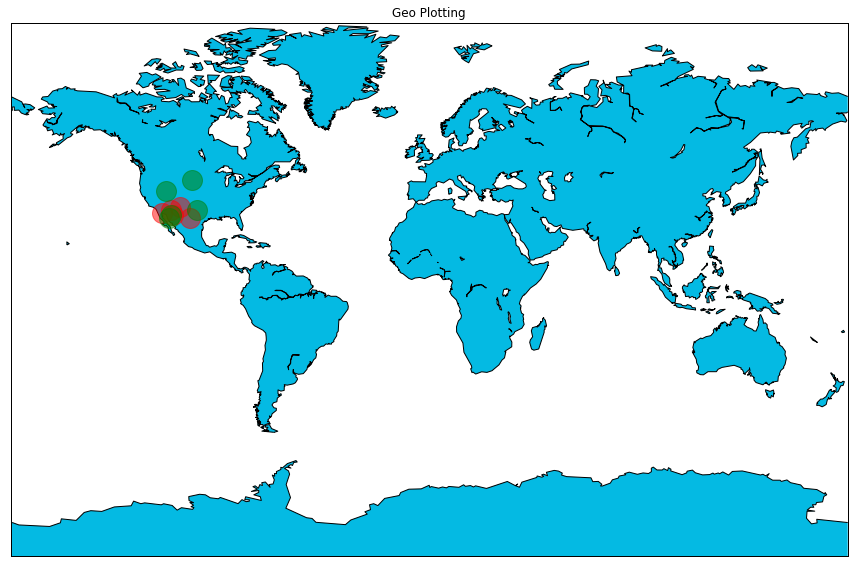

In [14]:
plt.figure(figsize=(15,20))
m = Basemap(projection='mill',llcrnrlat= -84,urcrnrlat= 84,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')

m.drawcoastlines()
#m.drawcountries()
#m.drawstates()
m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')

lat = 30,31,34,33,32
lon = -103,-110,-107,-111,-115


lat2 = 40,33,44,31,30
lon2 = -113,-100,-102,-111,-112

x,y = m(lon,lat)
m.plot(x,y,'ro',markersize=20,alpha=.5)

x,y = m(lon2,lat2)
m.plot(x,y,'go',markersize=20,alpha=.5)

plt.title('Geo Plotting')
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


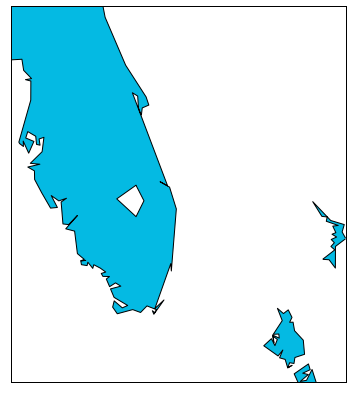

In [15]:
plt.figure(figsize=(6,8))
lat = 27
lon = -80
inclat = 3
inclon = 3

m = Basemap(projection='merc',
    llcrnrlon = lon - inclon, urcrnrlon = lon + inclon, 
    llcrnrlat = lat - inclat, urcrnrlat = lat + inclat, 
    lat_ts = 0, resolution= 'l',
    suppress_ticks = True)

m.drawcoastlines()
#m.drawcountries()
#m.drawstates()
m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
m.drawmapboundary(fill_color='#FFFFFF')
plt.show()

In [34]:
lat_ind = 167
lon_ind = 80 

chl_LO = []
rno_LO = []

for month in range(1,13):
    file = "2015_" + str(month) + ".nc4"
    all_data = netCDF4.Dataset(file)
    chl_LO.append(all_data.variables['chl'][:].data[0][lon_ind][lat_ind])
    rno_LO.append(all_data.variables['rno'][:].data[0][lon_ind][lat_ind])

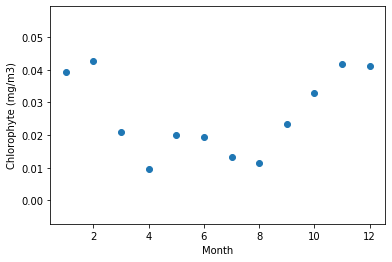

In [35]:
plt.scatter(range(1,13), chl_LO)
plt.xlabel("Month")
plt.ylabel("Chlorophyte (mg/m3)")
plt.show()

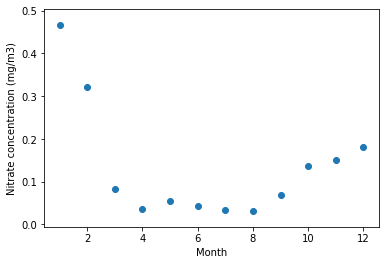

In [36]:
plt.scatter(range(1,13), rno_LO)
plt.xlabel("Month")
plt.ylabel("Nitrate concentration (mg/m3)")
plt.show()